# Proyek Analisis Data: Air Quality Dataset


## Menentukan Pertanyaan Bisnis

- Dimana wilayah yang menunjukkan kualitas udara terbaik?
-  Bagaimana pola perubahan polusi udara di berbagai wilayah sepanjang 2013 hingga 2017?
- Apa dampak dari kadar polusi udara terhadap variabel-variabel lingkungan?

## Import Semua Packages/Library yang Digunakan

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [48]:
data_loc = {
    "atz": "https://raw.githubusercontent.com/Sinestesiaaa/DA-air-quality-dataset/refs/heads/main/data/PRSA_Data_Aotizhongxin_20130301-20170228.csv",
    "chp": "https://raw.githubusercontent.com/Sinestesiaaa/DA-air-quality-dataset/refs/heads/main/data/PRSA_Data_Changping_20130301-20170228.csv",
    "dnl": "https://raw.githubusercontent.com/Sinestesiaaa/DA-air-quality-dataset/refs/heads/main/data/PRSA_Data_Dingling_20130301-20170228.csv",
    "dsi": "https://raw.githubusercontent.com/Sinestesiaaa/DA-air-quality-dataset/refs/heads/main/data/PRSA_Data_Dongsi_20130301-20170228.csv",
    "gyn": "https://raw.githubusercontent.com/Sinestesiaaa/DA-air-quality-dataset/refs/heads/main/data/PRSA_Data_Guanyuan_20130301-20170228.csv",
    "gch": "https://raw.githubusercontent.com/Sinestesiaaa/DA-air-quality-dataset/refs/heads/main/data/PRSA_Data_Gucheng_20130301-20170228.csv",
    "hur": "https://raw.githubusercontent.com/Sinestesiaaa/DA-air-quality-dataset/refs/heads/main/data/PRSA_Data_Huairou_20130301-20170228.csv",
    "ngz": "https://raw.githubusercontent.com/Sinestesiaaa/DA-air-quality-dataset/refs/heads/main/data/PRSA_Data_Nongzhanguan_20130301-20170228.csv",
    "sny": "https://raw.githubusercontent.com/Sinestesiaaa/DA-air-quality-dataset/refs/heads/main/data/PRSA_Data_Shunyi_20130301-20170228.csv",
    "ttn": "https://raw.githubusercontent.com/Sinestesiaaa/DA-air-quality-dataset/refs/heads/main/data/PRSA_Data_Tiantan_20130301-20170228.csv",
    "wlu": "https://raw.githubusercontent.com/Sinestesiaaa/DA-air-quality-dataset/refs/heads/main/data/PRSA_Data_Wanliu_20130301-20170228.csv",
    "wxg": "https://raw.githubusercontent.com/Sinestesiaaa/DA-air-quality-dataset/refs/heads/main/data/PRSA_Data_Wanshouxigong_20130301-20170228.csv"
}

Menggabungkan menjadi satu dataframe

In [49]:
df_list = []

for code, url in data_loc.items():
    station_name = url.split("PRSA_Data_")[1].split("_")[0]
    df = pd.read_csv(url)
    df["station"] = station_name
    df_list.append(df)

combined_df = pd.concat(df_list, ignore_index=True)
combined_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [50]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


**Insight:**
- Proses pengumpulan data dilakukan dengan mengakses seluruh dataset dari berbagai stasiun pengamatan udara.
- Seluruh data dari 12 stasiun digabungkan ke dalam satu DataFrame utama, namun tetap disertai informasi asal stasiun melalui kolom `station`.
- Pendekatan ini memudahkan proses eksplorasi dan analisis lintas lokasi, sekaligus memungkinkan filtrasi berdasarkan stasiun jika diperlukan untuk analisis lokal atau cleaning yang lebih spesifik.



### Assessing Data

Proses assessing data dilakukan secara keseluruhan terhadap DataFrame gabungan yang mencakup seluruh stasiun pengamatan. Hal ini memungkinkan identifikasi masalah data secara lebih efisien tanpa perlu memisahkan per stasiun. Secara umum, proses yang dilakukan meliputi:

1. Pengecekan data kosong menggunakan fungsi `isna()`

2. Pengecekan duplikasi data menggunakan fungsi `duplicated()`

**Missing Values**

In [51]:
total_missing = combined_df.isna().sum().sum()
print(f"Total missing values: {total_missing}")

Total missing values: 74027


In [52]:
cols_to_check = combined_df.columns.drop('station')

missing_per_station = combined_df[cols_to_check].groupby(combined_df['station']).apply(lambda x: x.isna().sum())

missing_per_station = missing_per_station.loc[:, (missing_per_station > 0).any()]

missing_per_station.style \
    .background_gradient(cmap='OrRd') \
    .format(na_rep="0") \
    .set_caption("Missing Values per Station per Column")

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
station,,,,,,,,,,,,
Aotizhongxin,925,718,935,1023,1776,1719,20,20,20,20,81,14
Changping,774,582,628,667,1521,604,53,50,53,51,140,43
Dingling,779,656,730,1234,2012,1214,53,50,53,51,140,43
Dongsi,750,553,663,1601,3197,664,20,20,20,20,78,14
Guanyuan,616,429,474,659,1753,1173,20,20,20,20,81,14
Gucheng,646,381,507,668,1401,729,51,50,51,43,159,42
Huairou,953,777,980,1639,1422,1151,51,53,53,55,302,49
Nongzhanguan,628,440,446,692,1206,506,20,20,20,20,78,14
Shunyi,913,548,1296,1365,2178,1489,51,51,54,51,483,44


**Insight:**
1. Variabel polutan utama seperti PM2.5, PM10, SO2, NO2, CO, dan O3 memiliki jumlah missing values yang tinggi di hampir semua stasiun.

  - Contohnya:

    - Stasiun Dongsi memiliki 3197 missing pada CO.

    - Stasiun Shunyi memiliki lebih dari 2100 missing pada CO dan O3.

2. Kolom TEMP, PRES, DEWP, RAIN umumnya memiliki jumlah missing yang jauh lebih kecil.

- Mayoritas stasiun hanya memiliki sekitar 20–55 missing values pada kolom ini.

- Pengecualian:

  - Huairou dan Shunyi memiliki RAIN dan wd yang cukup banyak hilang (hingga 300+ missing pada wd di hur).

**Rekomendasi Langkah:**

Dalam membersihkan data dan memastikan kualitas analisis, langkah penanganan missing values dilakukan dengan pendekatan berbasis interpolasi, khususnya karena dataset ini bersifat time series dan memiliki keterkaitan antar waktu.

- Untuk kolom numerik seperti `PM2.5`, `PM10`, `SO2`, `NO2`, `CO`, `O3`, `TEMP`, `PRES`, `DEWP`, `RAIN`, dan `WSPM`, nilai yang hilang akan diisi menggunakan metode interpolasi.
Metode ini dipilih karena interpolasi mampu memperkirakan nilai yang hilang secara lebih kontekstual berdasarkan tren data sebelum dan sesudahnya, sehingga hasilnya tetap representatif dan tidak menciptakan anomali.

- Untuk kolom kategorikal seperti `wd` (arah angin), interpolasi tidak dapat digunakan karena nilainya tidak bersifat numerik. Oleh karena itu, nilai yang hilang akan diisi menggunakan modus (nilai yang paling sering muncul) dalam stasiun yang sama.

Langkah ini dilakukan untuk menjaga representasi data per stasiun secara lokal, dan mengurangi potensi bias akibat penghapusan data yang terlalu besar.

**Duplicated Data**

In [53]:
duplicate_rows = combined_df.duplicated()
print(f"Jumlah data duplikat: {duplicate_rows.sum()}")

Jumlah data duplikat: 0


Tidak terdapat data duplikat pada dataset

### Cleaning Data

In [54]:
categorical_cols = ['wd']
numeric_cols = [col for col in combined_df.columns if col not in ['station', 'wd']]

imputed_df = pd.DataFrame()

for station in combined_df['station'].unique():

    station_df = combined_df[combined_df['station'] == station].copy()

    station_df[numeric_cols] = station_df[numeric_cols].interpolate(method='linear', limit_direction='both')

    for col in categorical_cols:
        if station_df[col].isna().any():
            mode_val = station_df[col].mode().iloc[0]
            station_df[col] = station_df[col].fillna(mode_val)

    imputed_df = pd.concat([imputed_df, station_df], ignore_index=True)

total_missing = imputed_df.isna().sum().sum()
print(f"Jumlah total missing setelah imputasi: {total_missing}")


Jumlah total missing setelah imputasi: 0


In [55]:
cols_to_check = imputed_df.columns.drop('station')

missing_per_station = imputed_df[cols_to_check].groupby(imputed_df['station']).apply(lambda x: x.isna().sum())

missing_per_station = missing_per_station.fillna(0).astype(int)

missing_per_station.style \
    .background_gradient(cmap='OrRd') \
    .format("{:,.0f}") \
    .set_caption("Missing Values per Station per Column")


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
station,,,,,,,,,,,,,,,,,
Aotizhongxin,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Changping,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Dingling,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Dongsi,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Guanyuan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Gucheng,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Huairou,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Nongzhanguan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Shunyi,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Terlihat bahwa sudah tidak ada data yang kosong

**Insight:**
- Imputasi dengan metode interpolasi berhasil dilakukan sudah tidak terdapat data yang kosong
- Kolom wd diimputasi dengan modus karena tidak dapat diinterpolasi

## Exploratory Data Analysis (EDA)

### Explore Rata-rata konsentrasi polutan di setiap stasiun pemantauan selama periode 2013 hingga 2017.

In [56]:
AQ_rank = imputed_df.groupby('station')[['PM2.5','PM10','SO2', 'NO2', 'CO', 'O3']].mean()

AQ_rank_ranking = AQ_rank.rank(ascending=False, method='min').astype(int)

AQ_rank_ranking.columns = [f"{col}_rank" for col in AQ_rank_ranking.columns]
AQ_summary = pd.concat([AQ_rank, AQ_rank_ranking], axis=1)

AQ_summary.style \
    .background_gradient(subset=AQ_rank.columns, cmap='Reds') \
    .background_gradient(subset=AQ_rank_ranking.columns, cmap='Blues_r') \
    .format("{:.2f}") \
    .set_caption("Rata-rata dan Ranking Polutan per Stasiun")


,PM2.5,PM10,SO2,NO2,CO,O3,PM2.5_rank,PM10_rank,SO2_rank,NO2_rank,CO_rank,O3_rank
station,,,,,,,,,,,,
Aotizhongxin,82.54,110.21,17.46,59.07,1264.69,55.33,7.00,5.00,5.00,2.00,7.00,9.00
Changping,70.99,94.79,14.94,44.21,1156.99,57.98,10.00,10.00,8.00,9.00,10.00,5.00
Dingling,66.85,84.11,11.80,27.30,925.11,70.53,12.00,12.00,12.00,12.00,12.00,1.00
Dongsi,86.14,110.35,18.51,53.95,1331.91,57.70,1.00,4.00,2.00,7.00,3.00,6.00
Guanyuan,82.90,109.37,17.61,58.14,1258.33,54.82,6.00,7.00,4.00,3.00,8.00,10.00
Gucheng,84.07,119.26,15.71,55.82,1338.10,58.00,4.00,1.00,7.00,5.00,2.00,4.00
Huairou,69.50,92.42,12.45,32.08,1019.67,60.87,11.00,11.00,11.00,11.00,11.00,2.00
Nongzhanguan,85.08,109.38,18.76,58.10,1327.77,58.43,2.00,6.00,1.00,4.00,5.00,3.00
Shunyi,79.44,99.27,13.45,44.09,1197.90,54.22,9.00,9.00,10.00,10.00,9.00,11.00


**MERAH**
- Warna semakin merah tua → nilai semakin tinggi.

- Warna lebih muda/pucat → nilai lebih rendah.

**BIRU**
- Warna biru tua → ranking rendah (lebih baik).

- Warna biru muda/pucat → ranking tinggi (lebih buruk).

In [57]:
polutan_rank = imputed_df.groupby('station')[['PM2.5','PM10']].mean().reset_index()
polutan_rank['average']=polutan_rank[['PM2.5','PM10']].mean(axis=1)
polutan_rank = polutan_rank.sort_values(by='average',ascending=True).reset_index(drop=True)
polutan_rank

,station,PM2.5,PM10,average
0,Dingling,66.845557,84.113713,75.479635
1,Huairou,69.501747,92.422670,80.962208
2,Changping,70.986438,94.788575,82.887506
3,Shunyi,79.437962,99.271936,89.354949
4,Tiantan,82.033097,106.537076,94.285087
5,Guanyuan,82.897522,109.372349,96.134935
6,Aotizhongxin,82.540623,110.210033,96.375328
7,Wanliu,83.467612,110.707858,97.087735
8,Nongzhanguan,85.079472,109.384022,97.231747
9,Dongsi,86.144243,110.347617,98.245930


In [58]:
station_gas_rank = imputed_df.groupby('station')[['SO2','NO2','CO','O3']].mean().reset_index()
station_gas_rank['average']=station_gas_rank[['SO2','NO2','CO','O3']].mean(axis=1)
station_gas_rank = station_gas_rank.sort_values(by='average',ascending=True).reset_index(drop=True)
station_gas_rank

,station,SO2,NO2,CO,O3,average
0,Dingling,11.797849,27.303589,925.111838,70.530792,258.686017
1,Huairou,12.446681,32.077275,1019.671871,60.872173,281.267000
2,Changping,14.943066,44.206153,1156.990246,57.976253,318.528930
3,Shunyi,13.445971,44.094695,1197.904660,54.218810,327.416034
4,Guanyuan,17.609312,58.139298,1258.327045,54.817142,347.223199
5,Aotizhongxin,17.459251,59.074106,1264.692405,55.328626,349.138597
6,Tiantan,14.510018,53.258828,1305.333262,56.148077,357.312546
7,Wanliu,18.409514,65.668418,1328.761180,46.909375,364.937122
8,Dongsi,18.506142,53.953078,1331.913045,57.700357,365.518155
9,Nongzhanguan,18.760102,58.095053,1327.767611,58.432876,365.763911


**Insight:**
- Secara akumulatif, Dingling, Huairou, dan Changping menjadi tiga stasiun dengan jumlah polusi terendah. Sedangkan dua stasiun dengan jumlah polutan tertinggi adalah Wangshouxigong dan Gucheng.

**Insight:**

**Stasiun dengan Polusi Tertinggi (peringkat 1 tertinggi)**
- Dushi dan Wanxianggu secara konsisten berada di peringkat atas untuk hampir semua jenis polutan:

  - Dushi: PM2.5 (1), PM10 (4), SO2 (2), NO2 (7), CO (3), O3 (6)

  - Wanxianggu: PM2.5 (3), PM10 (2), SO2 (3), NO2 (6), CO (1), O3 (8)

Ini menunjukkan bahwa kualitas udara di stasiun ini buruk dan perlu prioritas intervensi.

**Stasiun dengan Polusi Terendah (peringkat besar)**
- Dingling dan Huairou menempati ranking paling bawah (artinya polusi paling rendah) di banyak parameter:

  - Dingling: NO2 (12), PM2.5 (12), PM10 (12), CO (12), O3 (1)

  - Huairo: CO (11), NO2 (11), PM2.5 (11)

Ini menunjukkan kualitas udara yang relatif baik, bisa dijadikan benchmark untuk perbandingan atau studi lebih lanjut.

### Explore tren kadar polutan selama periode 2013–2017

2015 adalah tahun tengah (median)

In [66]:
bulan_dict = {
    1: 'Januari', 2: 'Februari', 3: 'Maret', 4: 'April',
    5: 'Mei', 6: 'Juni', 7: 'Juli', 8: 'Agustus',
    9: 'September', 10: 'Oktober', 11: 'November', 12: 'Desember'
}

imputed_df['date'] = pd.to_datetime(imputed_df[['year', 'month', 'day']])

df_yearly_gas = imputed_df.groupby(['year', 'month'])[['PM2.5','PM10','SO2', 'NO2', 'CO', 'O3']].mean().reset_index()
df_yearly_gas['months'] = df_yearly_gas['month'].map(bulan_dict)

df_yearly_gas = df_yearly_gas.sort_values(by=['year', 'month']).reset_index(drop=True)
df_2015 = df_yearly_gas[df_yearly_gas['year'] == 2015]
df_2015 = df_2015.drop(columns='month')

kolom_baru = ['year', 'months'] + [col for col in df_2015.columns if col not in ['year', 'months']]
df_2015 = df_2015[kolom_baru]

df_2015

,year,months,PM2.5,PM10,SO2,NO2,CO,O3
22,2015,Januari,96.122711,113.719538,34.258559,66.022491,1901.771580,23.603978
23,2015,Februari,93.078199,120.783495,26.663715,51.133036,1454.792907,39.082403
24,2015,Maret,86.384123,146.016252,20.791919,53.905888,1186.111111,50.685977
25,2015,April,71.839560,115.078432,9.285347,45.635056,755.619213,77.110990
26,2015,Mei,55.727503,95.617059,8.722278,37.260181,721.303763,96.679167
27,2015,Juni,60.668414,80.524329,6.707060,34.796470,1051.712963,95.021655
28,2015,Juli,60.951501,75.412444,4.794187,34.467742,814.241711,102.600414
29,2015,Agustus,44.303707,64.862455,3.594590,29.843974,780.006720,94.050459
30,2015,September,48.758218,63.247743,4.894155,40.574421,809.826389,59.582465
31,2015,Oktober,70.132728,89.317148,5.854223,52.042675,944.690860,39.525650


**Insight:**
- Polusi tertinggi terjadi di Desember: PM2.5, PM10, CO, dan SO2 melonjak signifikan.

- Kualitas udara terbaik di Juli–Agustus: mayoritas polutan berada di level terendah.

- Ozon (O₃) tertinggi di musim panas: Mei–Juli, dipicu sinar UV.

- CO mencapai puncak ekstrem di Desember: indikasi peningkatan emisi kendaraan atau pembakaran.

- SO2 stabil rendah tapi naik di akhir tahun: kemungkinan dari aktivitas industri.

### Explore hubungan antara kadar polutan dan kondisi lingkungan

In [67]:
col_interest=  ['PM2.5','PM10','SO2','NO2','CO','O3','TEMP','PRES','DEWP','RAIN','WSPM']
df_weather_vs_polutan = imputed_df[col_interest]
correlation_matrix = df_weather_vs_polutan.corr()
correlation_matrix

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
PM2.5,1.000000,0.878874,0.478223,0.664317,0.780165,-0.149508,-0.131607,0.019862,0.113045,-0.014452,-0.271425
PM10,0.878874,1.000000,0.460572,0.645598,0.691887,-0.110443,-0.096078,-0.018375,0.067674,-0.026505,-0.178200
SO2,0.478223,0.460572,1.000000,0.495827,0.522678,-0.165311,-0.320237,0.221235,-0.266121,-0.040028,-0.108536
NO2,0.664317,0.645598,0.495827,1.000000,0.694030,-0.465913,-0.277231,0.176605,-0.032512,-0.043661,-0.395716
CO,0.780165,0.691887,0.522678,0.694030,1.000000,-0.306979,-0.324057,0.188045,-0.060315,-0.013281,-0.290413
O3,-0.149508,-0.110443,-0.165311,-0.465913,-0.306979,1.000000,0.592248,-0.446725,0.312980,0.023361,0.294351
TEMP,-0.131607,-0.096078,-0.320237,-0.277231,-0.324057,0.592248,1.000000,-0.813312,0.820247,0.037647,0.032601
PRES,0.019862,-0.018375,0.221235,0.176605,0.188045,-0.446725,-0.813312,1.000000,-0.750271,-0.060952,0.065400
DEWP,0.113045,0.067674,-0.266121,-0.032512,-0.060315,0.312980,0.820247,-0.750271,1.000000,0.086259,-0.296771
RAIN,-0.014452,-0.026505,-0.040028,-0.043661,-0.013281,0.023361,0.037647,-0.060952,0.086259,1.000000,0.020975


**Insight:**
- PM2.5 sangat berkorelasi dengan:

  - PM10 (0.88), CO (0.78), dan NO2 (0.66) → indikasi sumber emisi yang sama (misalnya kendaraan).

- O₃ (ozon):

  - Korelasi positif kuat dengan suhu (0.59) → meningkat saat cuaca panas.

  - Korelasi negatif dengan tekanan udara (-0.45) → lebih tinggi saat tekanan rendah.

- PM2.5 & PM10:

  - Korelasi negatif dengan suhu, tekanan, dan kecepatan angin → partikel lebih banyak saat udara dingin dan tenang.

- Kecepatan angin (WSPM):

  - Korelasi negatif dengan sebagian besar polutan → membantu menghamburkan polusi udara.

- Kondisi lingkungan saling berkaitan:

  - Suhu vs tekanan = -0.81

  - Suhu vs kelembapan (DEWP) = 0.82

## Visualization & Explanatory Analysis

### Pertanyaan 1: - Stasiun mana yang menunjukkan kualitas udara terbaik?


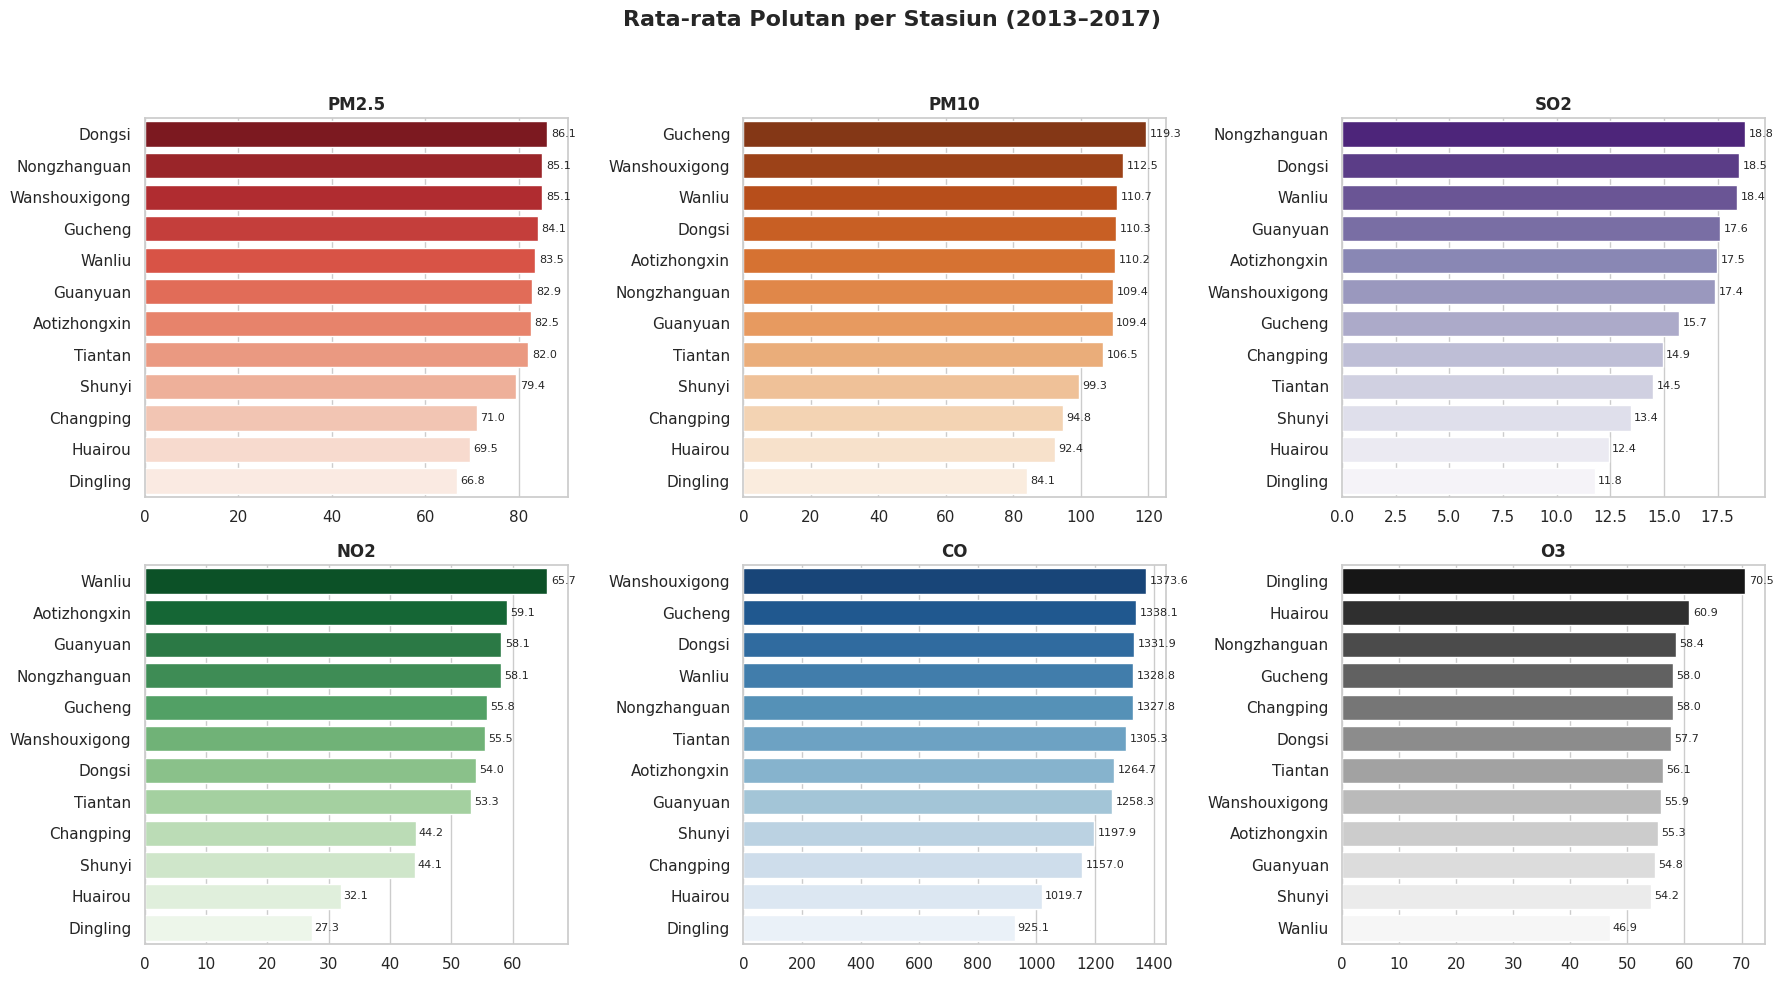

In [70]:
sns.set(style="whitegrid", font_scale=1.0)

pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
colors = {
    'PM2.5': 'Reds_r',
    'PM10': 'Oranges_r',
    'SO2': 'Purples_r',
    'NO2': 'Greens_r',
    'CO': 'Blues_r',
    'O3': 'Greys_r'
}

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, pollutant in enumerate(pollutants):
    ax = axes[i]

    station_rank = imputed_df.groupby('station')[pollutant].mean().sort_values(ascending=False)

    plot_df = pd.DataFrame({
        'station': station_rank.index,
        'value': station_rank.values,
        'hue': station_rank.index
    })

    sns.barplot(
        data=plot_df, x='value', y='station', hue='hue',
        palette=colors.get(pollutant, 'Reds_r'), dodge=False, legend=False, ax=ax
    )

    for j, value in enumerate(plot_df['value']):
        ax.text(value + 0.01 * value, j, f"{value:.1f}", va='center', fontsize=8)

    ax.set_title(f"{pollutant}", fontsize=12, weight='bold')
    ax.set_xlabel('')
    ax.set_ylabel('')

plt.suptitle("Rata-rata Polutan per Stasiun (2013–2017)", fontsize=16, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

**Insight:**
Berikut adalah insight ringkas dari visualisasi rata-rata polutan per stasiun (2013–2017):

- Stasiun dengan Polusi Tertinggi:

  - PM2.5: Dongsi tertinggi, diikuti Nongzhanguan.

  - PM10: Gucheng mendominasi.

  - SO2: Nongzhanguan paling tinggi.

  - NO2: Wanliu paling tercemar.

  - CO: Wanshouxigong memiliki konsentrasi tertinggi.

  - O3: Tinggi di Dingling, berbeda arah tren dengan polutan lain.

Stasiun dengan Polusi Terendah:

  - PM2.5 & PM10: Dingling, Huairou, dan Changping cenderung lebih bersih.

  - SO2, NO2, CO: Dingling dan Huairou konsisten di level rendah.

  - O3: Justru lebih tinggi di Dingling dan Huairou (berbanding terbalik dengan polutan lain).

- Pola Umum:

  - Wilayah perkotaan seperti Dongsi, Gucheng, dan Nongzhanguan umumnya memiliki kadar polusi lebih tinggi.

  - O3 menunjukkan tren berbeda: lebih tinggi di wilayah pinggiran seperti Dingling dan Huairou.

### Pertanyaan 2: -  Bagaimana pola perubahan polusi udara di berbagai wilayah sepanjang 2013 hingga 2017?

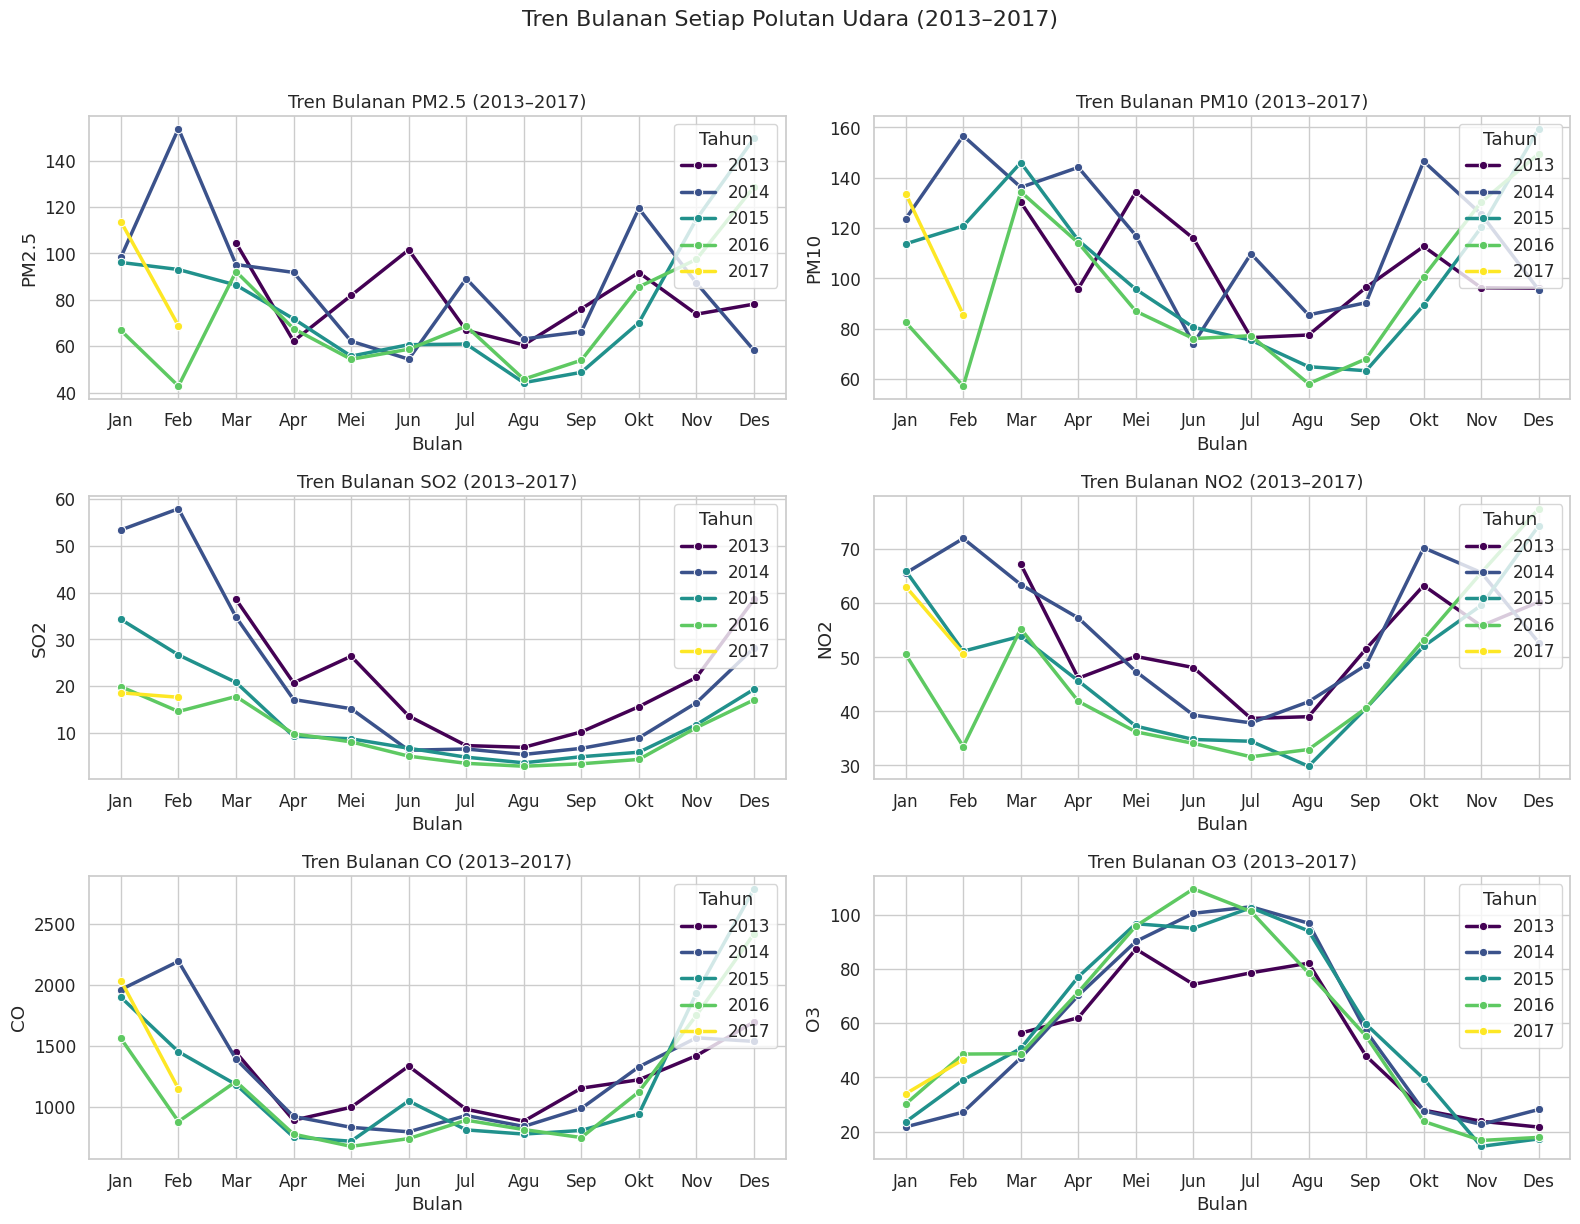

In [74]:
month_label = ['Jan', 'Feb','Mar','Apr','Mei','Jun','Jul','Agu','Sep','Okt','Nov','Des']

df_yearly_gas = imputed_df.groupby(['year', 'month'])[['PM2.5','PM10','SO2', 'NO2', 'CO', 'O3']].mean().reset_index()

pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

sns.set(style="whitegrid", font_scale=1.1)
fig, axes = plt.subplots(3, 2, figsize=(16, 12))
axes = axes.flatten()

for idx, pollutant in enumerate(pollutants):
    ax = axes[idx]
    sns.lineplot(
        data=df_yearly_gas,
        x='month',
        y=pollutant,
        hue='year',
        marker='o',
        palette='viridis',
        linewidth=2.5,
        ax=ax
    )
    ax.set_title(f'Tren Bulanan {pollutant} (2013–2017)', fontsize=13)
    ax.set_xlabel('Bulan')
    ax.set_ylabel(pollutant)
    ax.set_xticks(range(1, 13))
    ax.set_xticklabels(month_label)
    ax.legend(title='Tahun', loc='upper right')

plt.suptitle('Tren Bulanan Setiap Polutan Udara (2013–2017)', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

**Insight:**
- PM2.5 & PM10: Konsisten tinggi di musim dingin (Jan–Feb, Nov–Des), dan rendah di musim panas (Mei–Ags), menunjukkan pengaruh musim dingin terhadap peningkatan partikel halus.

- SO2 & NO2: Tren menurun dari awal tahun ke pertengahan, lalu naik kembali menjelang akhir tahun. Ini bisa berkaitan dengan aktivitas pembakaran atau pemakaian energi musiman.

- CO: Pola serupa dengan PM, tinggi di musim dingin dan rendah saat musim panas. Ini mendukung keterkaitan dengan pemanasan atau transportasi di musim dingin.

- O3 (ozon): Kebalikan dari polutan lain — tertinggi saat musim panas (Mei–Ags) dan rendah di musim dingin. Ini wajar karena ozon terbentuk lebih banyak saat intensitas sinar matahari tinggi.

Kesimpulan: Polusi udara lebih buruk di musim dingin untuk sebagian besar polutan, kecuali ozon yang justru meningkat saat musim panas.

### Pertanyaan 3: - Apa dampak dari kadar polusi udara terhadap variabel-variabel lingkungan?

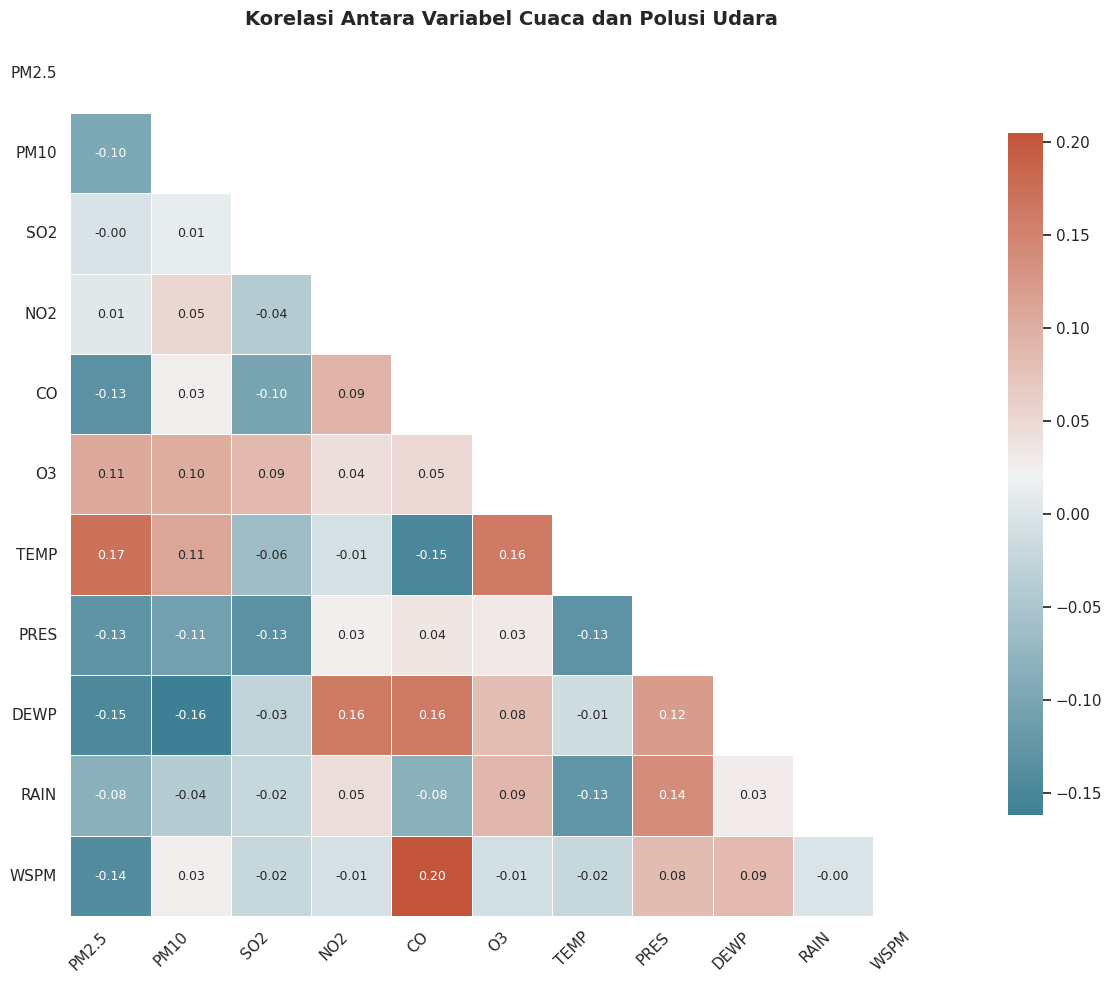

In [75]:
np.random.seed(42)
data = np.random.rand(100, 11)
col_interest = ['PM2.5','PM10','SO2','NO2','CO','O3','TEMP','PRES','DEWP','RAIN','WSPM']
df_weather_vs_polutan = pd.DataFrame(data, columns=col_interest)

correlation_matrix = df_weather_vs_polutan.corr()

plt.figure(figsize=(12, 10))
sns.set(style="white")
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
cmap = sns.diverging_palette(220, 20, as_cmap=True)

sns.heatmap(
    correlation_matrix,
    mask=mask,
    cmap=cmap,
    annot=True,
    fmt=".2f",
    square=True,
    linewidths=.5,
    cbar_kws={"shrink": .75},
    annot_kws={"size": 9}
)

plt.title('Korelasi Antara Variabel Cuaca dan Polusi Udara', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

**Insight:**
- PM2.5 dan PM10 memiliki korelasi sangat kuat (0.88) → menunjukkan keduanya sering meningkat bersamaan.

- Polutan CO, NO2, dan SO2 berkorelasi cukup kuat dengan PM2.5 dan PM10 → mengindikasikan sumber emisi yang mirip (misalnya kendaraan atau industri).

- O3 (ozon) berkorelasi negatif dengan hampir semua polutan lain, terutama NO2 → karena O3 terbentuk secara fotokimia dari NO2 di bawah sinar matahari.

- Temperatur (TEMP) memiliki korelasi positif dengan O3 (0.59) dan negatif dengan polutan lain, menandakan O3 lebih tinggi saat cuaca panas.

- Tekanan udara (PRES) berkorelasi negatif dengan TEMP (-0.81) dan O3 (-0.44) → tekanan rendah bisa berkaitan dengan peningkatan aktivitas fotokimia.

- Kelembaban (DEWP) berkorelasi positif dengan TEMP (0.82), dan agak negatif dengan PM2.5 → udara lembap bisa membantu pengendapan partikel.

- Kecepatan angin (WSPM) berkorelasi negatif dengan PM2.5 dan NO2 → angin membantu menyebarkan polutan dan menurunkan konsentrasi lokal.

## Conclusion

**Polusi Udara Berdasarkan Lokasi (Rata-rata per Stasiun)**
- Dongsi, Wanshouxigong, dan Gucheng memiliki tingkat polusi tertinggi untuk sebagian besar polutan.

- Dingling dan Huairou tercatat sebagai stasiun dengan kualitas udara terbaik (polusi paling rendah).

- Beberapa stasiun konsisten menunjukkan tingginya kadar beberapa jenis polutan, menandakan sumber polusi lokal.

**Tren Bulanan Polutan (2013–2017)**
- Sebagian besar polutan (PM2.5, PM10, NO2, CO, SO2) meningkat di musim dingin (Des–Feb) dan menurun di musim panas (Jun–Sep).

- Sebaliknya, O3 (ozon) menunjukkan pola terbalik: tinggi saat musim panas, dan rendah di musim dingin.

- Pola ini konsisten dari tahun ke tahun, menandakan pengaruh musiman yang kuat terhadap kualitas udara.

**Korelasi antara Cuaca dan Polusi**
- PM2.5, PM10, CO, NO2, dan SO2 berkorelasi kuat satu sama lain, menunjukkan asal emisi yang serupa.

- O3 memiliki korelasi negatif dengan polutan lain, tetapi positif dengan suhu → pembentukan O3 dipicu oleh panas dan sinar matahari.

- Angin (WSPM) dan kelembapan cenderung membantu menurunkan kadar polutan, menunjukkan pentingnya kondisi cuaca dalam memengaruhi kualitas udara.
